# CPU use case with Keras for Linear Regression

####Code Modified from: 

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_regression.ipynb#scrollTo=JlC5ooJrgjQF

In [11]:
#Import packages
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

print(tf.__version__)

1.1.0


In [14]:
dataset_path = "/Users/nicoleeickhoff/Desktop/data_projects/TensorFlow_SL_test.csv"
dataset_path

'/Users/nicoleeickhoff/Desktop/data_projects/TensorFlow_SL_test.csv'

In [52]:
df = pd.read_csv(dataset_path)
df.head()
df_2_nums = df.drop(["devicename"], axis=1) #drop non-numerical data for now, also can one-hot encode later to add feature back in
df_2_nums.head()

,timestamp,hour,minute,day,week,month,cpu,mem,diskread,diskwrite,netread,netwrite
0,1532876980,10,9,7,30,7,7.762547,11.240772,14.660210,17.215395,6.747979,10.738293
1,1532877280,10,14,7,30,7,7.191325,10.647117,14.263264,17.784736,6.121908,10.451037
2,1532877580,10,19,7,30,7,6.423410,11.292926,14.760593,17.528150,6.314390,10.038342
3,1532877880,10,24,7,30,7,7.020175,11.247351,14.209757,17.176362,6.963220,10.214083
4,1532878180,10,29,7,30,7,6.430316,10.206723,14.889755,17.651702,6.053399,10.192617


In [18]:
df.isnull().sum()
#beautiful

timestamp     0
hour          0
minute        0
day           0
week          0
month         0
devicename    0
cpu           0
mem           0
diskread      0
diskwrite     0
netread       0
netwrite      0
dtype: int64

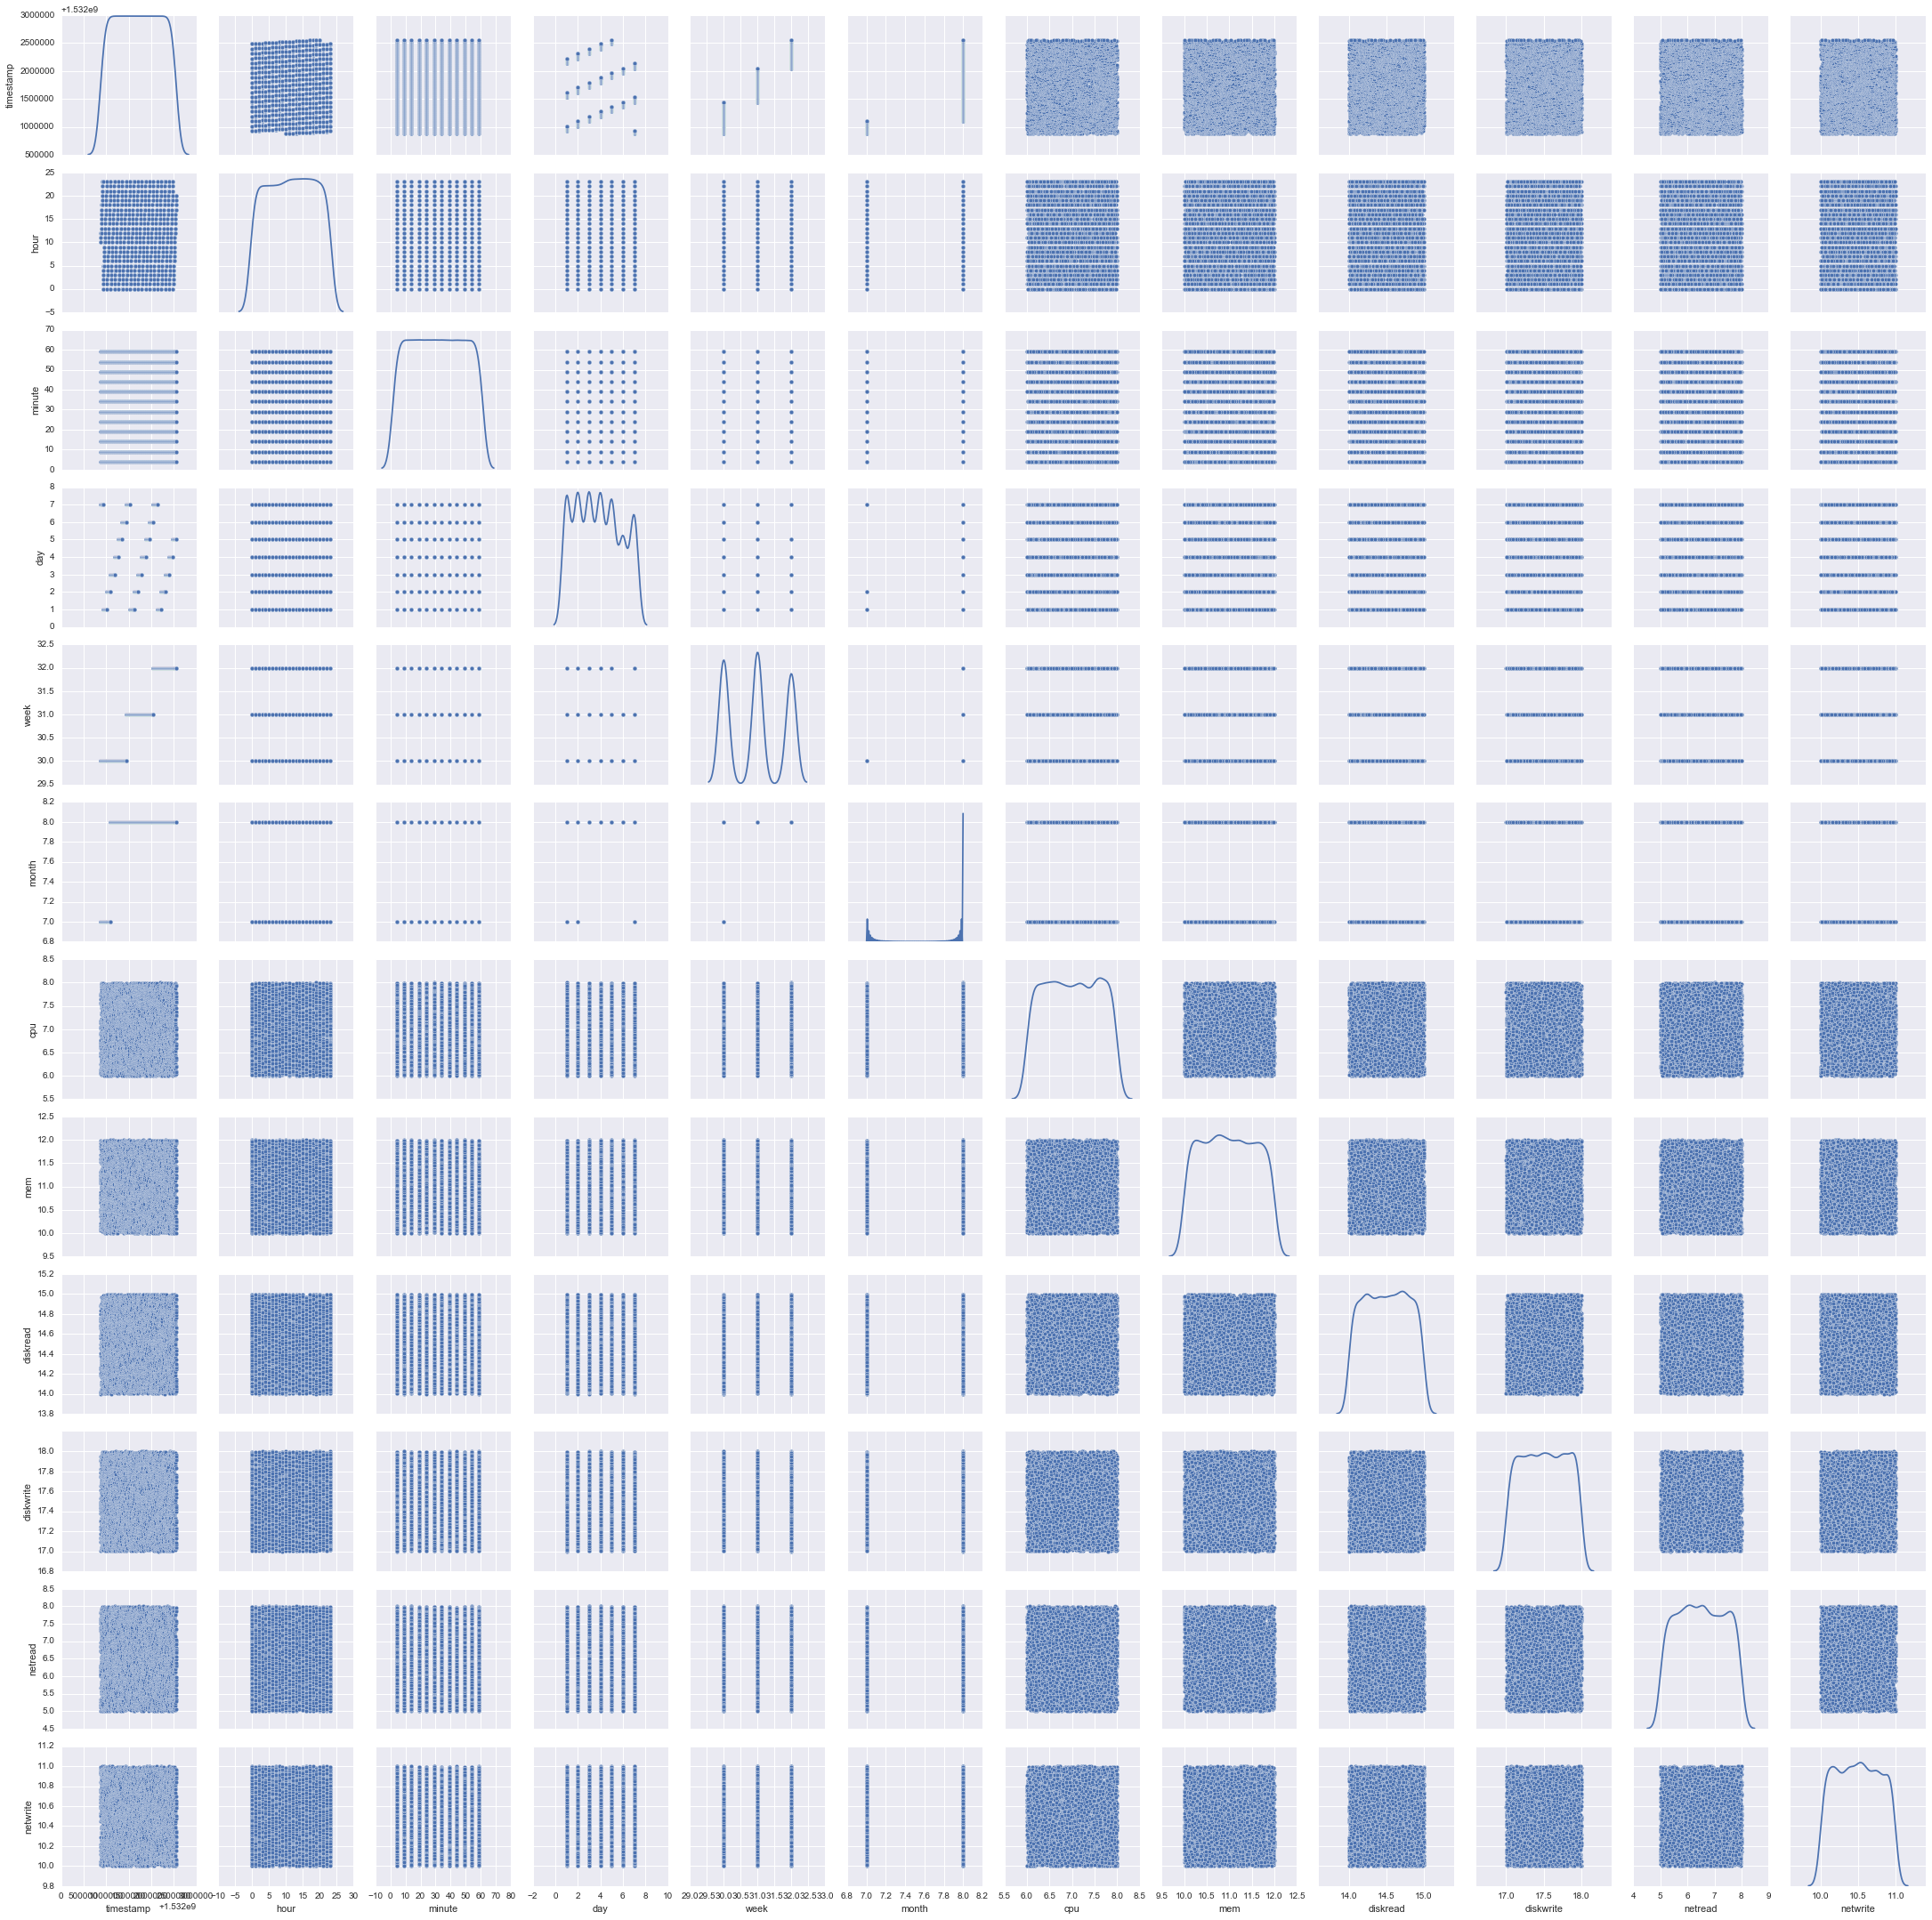

In [38]:
%matplotlib inline

sns.pairplot(df, diag_kind="kde")
#normal distributions

## Preprocessing:

In [74]:
#Train test split:
train_dataset = df_2_nums.sample(frac=0.8,random_state=0)
test_dataset = df_2_nums.drop(train_dataset.index)

In [95]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
timestamp,4478.0,1.533714e+09,484644.004362,1.532877e+09,1.533293e+09,1.533715e+09,1.534135e+09,1.534556e+09
hour,4478.0,1.155583e+01,6.867187,0.000000e+00,6.000000e+00,1.200000e+01,1.700000e+01,2.300000e+01
minute,4478.0,3.155025e+01,17.248309,4.000000e+00,1.900000e+01,3.400000e+01,4.900000e+01,5.900000e+01
day,4478.0,3.827825e+00,1.973368,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00
week,4478.0,3.095936e+01,0.800464,3.000000e+01,3.000000e+01,3.100000e+01,3.200000e+01,3.200000e+01
month,4478.0,7.867351e+00,0.339232,7.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
cpu,4478.0,6.996727e+00,0.579571,6.000248e+00,6.496869e+00,6.998354e+00,7.510060e+00,7.996823e+00
mem,4478.0,1.098921e+01,0.579657,1.000078e+01,1.048865e+01,1.097855e+01,1.148701e+01,1.199983e+01
diskread,4478.0,1.449835e+01,0.286670,1.400098e+01,1.425045e+01,1.450212e+01,1.474259e+01,1.499846e+01
diskwrite,4478.0,1.750389e+01,0.288390,1.700003e+01,1.725079e+01,1.750246e+01,1.775521e+01,1.799968e+01


In [96]:
#normalize data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [97]:
# create labels
train_labels = normed_train_data['cpu']
test_labels = normed_test_data['cpu']
len(train_labels)
len(test_labels)

1120

## Build Keras layers

In [109]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [110]:
model = build_model()

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                832       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [112]:
example_batch = normed_train_data[:10]
example_batch

example_result = model.predict(example_batch[:10])
example_result

array([[-0.09380762],
       [-0.24618655],
       [-0.918271  ],
       [-0.21432787],
       [-0.18109444],
       [-0.35721445],
       [-0.8858867 ],
       [-0.01739625],
       [ 0.10696852],
       [-0.6151432 ]], dtype=float32)

In [140]:
# Display training progress 
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  train_dataset, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [141]:
import math

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

def rmse(x):
    return (math.sqrt(x))
hist['RMSE'] = hist['mean_squared_error'].apply(rmse)

hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch,RMSE
995,0.997693,0.865173,0.997693,1.009351,0.880892,1.009351,995,0.998846
996,0.997620,0.865115,0.997620,1.008959,0.880807,1.008959,996,0.998809
997,0.997636,0.865118,0.997636,1.008790,0.880768,1.008790,997,0.998818
998,0.997732,0.865164,0.997732,1.009013,0.880819,1.009013,998,0.998865
999,0.997664,0.865139,0.997664,1.008964,0.880808,1.008964,999,0.998831


In [142]:
# Early stopping method from the tutorial:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


......................................................................

# Root Mean Squared Error

In [143]:
loss, mae, rmse = model.evaluate(test_dataset, test_labels, verbose=0)
# rmse = math.sqrt(mse)
print("Testing set Root Mean Squared Error: {} cpu".format(rmse))

Testing set Root Mean Squared Error: 1.04031176737 cpu


In [144]:
test_predictions = model.predict(test_dataset).flatten()

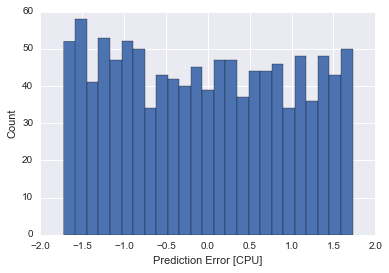

In [145]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [CPU]")
_ = plt.ylabel("Count")

## Summary: 

Using the MSG predictor from the Tensorflow/Colab tutorial, I implemented three Keras layers for a linear regression model to predict CPU usage. The metric we are looking for is RMSE, which, for this round was {} for the test set. 

## Sources and Future Research: 
    
    -https://homepage.univie.ac.at/robert.kunst/pres11_var_brunhart.pdf
    -https://www.hou.usra.edu/meetings/lpsc2016/pdf/2191.pdf (Tables 1&2)
    -LSTM v. ARIMA https://www.researchgate.net/publication/324014977_CPU_Workload_forecasting_of_Machines_in_Data_Centers_using_LSTM_Recurrent_Neural_Networks_and_ARIMA_Models
    -https://ac.els-cdn.com/S0895717709001794/1-s2.0-S0895717709001794-main.pdf?_tid=12679985-751c-4b09-a83d-cb734bc9235d&acdnat=1545272129_1580fe2fb3c470801298d05b646d05aa